In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sb

import matplotlib
# AppleGothic
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [12]:
!pip install seaborn

     -------------------------------------- 288.2/288.2 kB 3.6 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('data/pima-indians-diabetes.data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [3]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:, [-1]].values

In [5]:
scaler = MinMaxScaler()
x_dataN = scaler.fit_transform( x_data )

In [6]:
x_train, x_test, y_train, y_test = train_test_split( x_dataN, y_data, 
                                                test_size=0.3, stratify=y_data )

In [7]:
x_train.shape

(537, 8)

In [8]:
x_test.shape

(231, 8)

In [42]:
dense = Dense( units=1, input_dim=8 , activation='sigmoid' ) # w:8x1 b:1
model = Sequential( [dense] )
model.compile( loss='binary_crossentropy', optimizer=Adam(0.1), metrics=['acc']  )
h = model.fit( x_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.6898 - acc: 0.5944 - val_loss: 0.6287 - val_acc: 0.7037
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.6245 - acc: 0.6737 - val_loss: 0.6121 - val_acc: 0.6944
Epoch 3/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.6162 - acc: 0.6573 - val_loss: 0.6212 - val_acc: 0.6574
Epoch 4/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.5864 - acc: 0.7156 - val_loss: 0.5811 - val_acc: 0.6852
Epoch 5/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.5733 - acc: 0.6970 - val_loss: 0.5971 - val_acc: 0.6759
Epoch 6/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.5579 - acc: 0.7156 - val_loss: 0.5728 - val_acc: 0.7130
Epoch 7/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.5493 - acc: 0.7063 - val_loss: 0.5977 - val_acc: 0.6574
Epoch 8/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4519 - acc: 0.8019 - val_loss: 0.5506 - val_acc: 0.7130
Epoch 63/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4477 - acc: 0.8112 - val_loss: 0.5419 - val_acc: 0.7222
Epoch 64/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4485 - acc: 0.8135 - val_loss: 0.5453 - val_acc: 0.7130
Epoch 65/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4473 - acc: 0.8112 - val_loss: 0.5387 - val_acc: 0.7037
Epoch 66/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4473 - acc: 0.8089 - val_loss: 0.5546 - val_acc: 0.7130
Epoch 67/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4590 - acc: 0.7925 - val_loss: 0.5388 - val_acc: 0.7130
Epoch 68/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4455 - acc: 0.8089 - val_loss: 0.5583 - val_acc: 0.7130
Epoch 69/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4443 -

14/14 [==============================] - 0s 3ms/step - loss: 0.4433 - acc: 0.8065 - val_loss: 0.5612 - val_acc: 0.7037
Epoch 124/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4424 - acc: 0.8112 - val_loss: 0.5609 - val_acc: 0.7037
Epoch 125/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4488 - acc: 0.7972 - val_loss: 0.5766 - val_acc: 0.7130
Epoch 126/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4489 - acc: 0.7925 - val_loss: 0.5555 - val_acc: 0.7037
Epoch 127/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4573 - acc: 0.7972 - val_loss: 0.5584 - val_acc: 0.7037
Epoch 128/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4436 - acc: 0.8089 - val_loss: 0.5597 - val_acc: 0.7037
Epoch 129/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4449 - acc: 0.8065 - val_loss: 0.5681 - val_acc: 0.7037
Epoch 130/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4438 - acc: 0.8159 - val_loss: 0.5677 - val_acc: 0.7037
Epoch 185/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4422 - acc: 0.8112 - val_loss: 0.5683 - val_acc: 0.7037
Epoch 186/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4442 - acc: 0.8042 - val_loss: 0.5619 - val_acc: 0.7130
Epoch 187/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4425 - acc: 0.8112 - val_loss: 0.5689 - val_acc: 0.6944
Epoch 188/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4442 - acc: 0.8065 - val_loss: 0.5645 - val_acc: 0.7130
Epoch 189/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4437 - acc: 0.8159 - val_loss: 0.5665 - val_acc: 0.6944
Epoch 190/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4461 - acc: 0.7925 - val_loss: 0.5686 - val_acc: 0.7037
Epoch 191/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4455 - acc: 0.7972 - val_loss: 0.5676 - val_acc: 0.7130
Epoch 246/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4442 - acc: 0.8112 - val_loss: 0.5640 - val_acc: 0.7130
Epoch 247/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4438 - acc: 0.8042 - val_loss: 0.5817 - val_acc: 0.7037
Epoch 248/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4498 - acc: 0.8019 - val_loss: 0.5632 - val_acc: 0.7037
Epoch 249/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4462 - acc: 0.8042 - val_loss: 0.5687 - val_acc: 0.6944
Epoch 250/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4474 - acc: 0.8089 - val_loss: 0.5644 - val_acc: 0.7037
Epoch 251/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4511 - acc: 0.8042 - val_loss: 0.5607 - val_acc: 0.7130
Epoch 252/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4425 - acc: 0.8112 - val_loss: 0.5705 - val_acc: 0.7037
Epoch 307/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4427 - acc: 0.8112 - val_loss: 0.5682 - val_acc: 0.7130
Epoch 308/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4508 - acc: 0.8019 - val_loss: 0.5774 - val_acc: 0.7037
Epoch 309/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4421 - acc: 0.8065 - val_loss: 0.5704 - val_acc: 0.7037
Epoch 310/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4414 - acc: 0.8112 - val_loss: 0.5750 - val_acc: 0.7037
Epoch 311/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4425 - acc: 0.7995 - val_loss: 0.5683 - val_acc: 0.7130
Epoch 312/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4422 - acc: 0.8159 - val_loss: 0.5837 - val_acc: 0.6944
Epoch 313/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4516 - acc: 0.7879 - val_loss: 0.5645 - val_acc: 0.7037
Epoch 368/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4456 - acc: 0.8112 - val_loss: 0.5686 - val_acc: 0.6944
Epoch 369/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4442 - acc: 0.8019 - val_loss: 0.5729 - val_acc: 0.7037
Epoch 370/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4421 - acc: 0.8205 - val_loss: 0.5682 - val_acc: 0.7037
Epoch 371/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4444 - acc: 0.8135 - val_loss: 0.5777 - val_acc: 0.7130
Epoch 372/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4435 - acc: 0.8135 - val_loss: 0.5667 - val_acc: 0.7130
Epoch 373/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4474 - acc: 0.8112 - val_loss: 0.5818 - val_acc: 0.7037
Epoch 374/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4453 - acc: 0.8019 - val_loss: 0.5671 - val_acc: 0.7130
Epoch 429/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4484 - acc: 0.8042 - val_loss: 0.5802 - val_acc: 0.7130
Epoch 430/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4476 - acc: 0.8065 - val_loss: 0.5647 - val_acc: 0.7037
Epoch 431/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4441 - acc: 0.8112 - val_loss: 0.5790 - val_acc: 0.7037
Epoch 432/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4472 - acc: 0.8159 - val_loss: 0.5653 - val_acc: 0.7037
Epoch 433/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4426 - acc: 0.8135 - val_loss: 0.5844 - val_acc: 0.7037
Epoch 434/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4488 - acc: 0.8042 - val_loss: 0.5632 - val_acc: 0.7037
Epoch 435/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4474 - acc: 0.8065 - val_loss: 0.5633 - val_acc: 0.7130
Epoch 490/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4455 - acc: 0.8019 - val_loss: 0.5685 - val_acc: 0.7130
Epoch 491/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4441 - acc: 0.8112 - val_loss: 0.5662 - val_acc: 0.7130
Epoch 492/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4423 - acc: 0.8112 - val_loss: 0.5641 - val_acc: 0.7130
Epoch 493/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4474 - acc: 0.7995 - val_loss: 0.5742 - val_acc: 0.7037
Epoch 494/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4428 - acc: 0.8065 - val_loss: 0.5670 - val_acc: 0.7130
Epoch 495/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.4437 - acc: 0.8065 - val_loss: 0.5703 - val_acc: 0.6944
Epoch 496/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4435 - acc: 0.8182 - val_loss: 0.5682 - val_acc: 0.7130
Epoch 551/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4465 - acc: 0.7972 - val_loss: 0.5673 - val_acc: 0.7037
Epoch 552/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4465 - acc: 0.8089 - val_loss: 0.5756 - val_acc: 0.7037
Epoch 553/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4433 - acc: 0.8089 - val_loss: 0.5644 - val_acc: 0.7130
Epoch 554/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4443 - acc: 0.8042 - val_loss: 0.5801 - val_acc: 0.7130
Epoch 555/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4507 - acc: 0.7949 - val_loss: 0.5653 - val_acc: 0.7037
Epoch 556/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4443 - acc: 0.8112 - val_loss: 0.5830 - val_acc: 0.7130
Epoch 557/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4549 - acc: 0.7949 - val_loss: 0.5646 - val_acc: 0.7130
Epoch 612/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4483 - acc: 0.8042 - val_loss: 0.5632 - val_acc: 0.7037
Epoch 613/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4622 - acc: 0.7995 - val_loss: 0.5995 - val_acc: 0.6852
Epoch 614/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4570 - acc: 0.7972 - val_loss: 0.5641 - val_acc: 0.7130
Epoch 615/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4431 - acc: 0.8089 - val_loss: 0.5759 - val_acc: 0.7037
Epoch 616/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4438 - acc: 0.8065 - val_loss: 0.5615 - val_acc: 0.7037
Epoch 617/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4553 - acc: 0.8159 - val_loss: 0.5788 - val_acc: 0.7037
Epoch 618/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4531 - acc: 0.8065 - val_loss: 0.5768 - val_acc: 0.7037
Epoch 673/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4426 - acc: 0.8065 - val_loss: 0.5690 - val_acc: 0.7130
Epoch 674/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4441 - acc: 0.8089 - val_loss: 0.5637 - val_acc: 0.7130
Epoch 675/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4442 - acc: 0.8135 - val_loss: 0.5667 - val_acc: 0.7037
Epoch 676/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4436 - acc: 0.8135 - val_loss: 0.5739 - val_acc: 0.7037
Epoch 677/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4478 - acc: 0.8135 - val_loss: 0.5631 - val_acc: 0.7037
Epoch 678/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4558 - acc: 0.8042 - val_loss: 0.6147 - val_acc: 0.6759
Epoch 679/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4475 - acc: 0.8019 - val_loss: 0.5714 - val_acc: 0.7037
Epoch 734/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4427 - acc: 0.8112 - val_loss: 0.5641 - val_acc: 0.7037
Epoch 735/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4487 - acc: 0.8089 - val_loss: 0.5749 - val_acc: 0.7130
Epoch 736/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4480 - acc: 0.8065 - val_loss: 0.5698 - val_acc: 0.7037
Epoch 737/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4429 - acc: 0.8135 - val_loss: 0.5668 - val_acc: 0.7037
Epoch 738/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4435 - acc: 0.8182 - val_loss: 0.5695 - val_acc: 0.7037
Epoch 739/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4482 - acc: 0.8065 - val_loss: 0.5651 - val_acc: 0.7130
Epoch 740/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4496 - acc: 0.8019 - val_loss: 0.5774 - val_acc: 0.7130
Epoch 795/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4481 - acc: 0.8089 - val_loss: 0.5774 - val_acc: 0.7037
Epoch 796/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4466 - acc: 0.8042 - val_loss: 0.5684 - val_acc: 0.7037
Epoch 797/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4419 - acc: 0.8112 - val_loss: 0.5807 - val_acc: 0.7037
Epoch 798/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4450 - acc: 0.8089 - val_loss: 0.5716 - val_acc: 0.7037
Epoch 799/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4435 - acc: 0.8159 - val_loss: 0.5735 - val_acc: 0.7037
Epoch 800/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4451 - acc: 0.8019 - val_loss: 0.5670 - val_acc: 0.7130
Epoch 801/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4443 - acc: 0.8042 - val_loss: 0.5669 - val_acc: 0.7130
Epoch 856/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4434 - acc: 0.8042 - val_loss: 0.5752 - val_acc: 0.7037
Epoch 857/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4531 - acc: 0.8065 - val_loss: 0.5657 - val_acc: 0.7130
Epoch 858/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4496 - acc: 0.8089 - val_loss: 0.5845 - val_acc: 0.6944
Epoch 859/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4434 - acc: 0.7972 - val_loss: 0.5670 - val_acc: 0.7037
Epoch 860/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4451 - acc: 0.8159 - val_loss: 0.6006 - val_acc: 0.6944
Epoch 861/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4560 - acc: 0.7925 - val_loss: 0.5674 - val_acc: 0.7037
Epoch 862/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4516 - acc: 0.8042 - val_loss: 0.5792 - val_acc: 0.7037
Epoch 917/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.4484 - acc: 0.8089 - val_loss: 0.5655 - val_acc: 0.7037
Epoch 918/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4444 - acc: 0.8112 - val_loss: 0.5736 - val_acc: 0.7037
Epoch 919/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4430 - acc: 0.8065 - val_loss: 0.5739 - val_acc: 0.7037
Epoch 920/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4464 - acc: 0.8159 - val_loss: 0.5764 - val_acc: 0.7037
Epoch 921/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4438 - acc: 0.8112 - val_loss: 0.5677 - val_acc: 0.7037
Epoch 922/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4498 - acc: 0.8065 - val_loss: 0.5735 - val_acc: 0.7037
Epoch 923/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

14/14 [==============================] - 0s 3ms/step - loss: 0.4469 - acc: 0.8042 - val_loss: 0.5702 - val_acc: 0.7037
Epoch 978/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4422 - acc: 0.8135 - val_loss: 0.5628 - val_acc: 0.7037
Epoch 979/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4476 - acc: 0.8042 - val_loss: 0.5649 - val_acc: 0.7130
Epoch 980/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4429 - acc: 0.8089 - val_loss: 0.5689 - val_acc: 0.6944
Epoch 981/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4486 - acc: 0.7972 - val_loss: 0.5637 - val_acc: 0.7037
Epoch 982/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4434 - acc: 0.8205 - val_loss: 0.5754 - val_acc: 0.7037
Epoch 983/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4449 - acc: 0.8065 - val_loss: 0.5668 - val_acc: 0.7130
Epoch 984/1000
14/14 [==============================] - 0s 3ms/step - loss: 0

In [17]:
pred = ( model.predict( x_train ) > 0.5) +0
pred

17/17 [==============================] - 0s 949us/step


array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [18]:
accuracy_score( y_train, pred )

0.7877094972067039

In [23]:
f1_score( y_train, pred)

0.6742857142857142

In [19]:
predt = ( model.predict( x_test ) > 0.5) +0
predt

8/8 [==============================] - 0s 915us/step


array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [20]:
accuracy_score( y_test, predt )

0.7619047619047619

In [24]:
f1_score( y_test, predt)

0.6308724832214765

In [21]:
model.evaluate( x_train, y_train )

17/17 [==============================] - 0s 2ms/step - loss: 0.4616 - acc: 0.7877


[0.4615660309791565, 0.7877094745635986]

In [22]:
model.evaluate( x_test, y_test )

8/8 [==============================] - 0s 1ms/step - loss: 0.5025 - acc: 0.7619


[0.502453625202179, 0.761904776096344]

In [ ]:
f1_score

In [26]:
c = confusion_matrix( y_train, pred)
c

array([[305,  45],
       [ 69, 118]], dtype=int64)

https://matplotlib.org/stable/tutorials/colors/colormaps.html

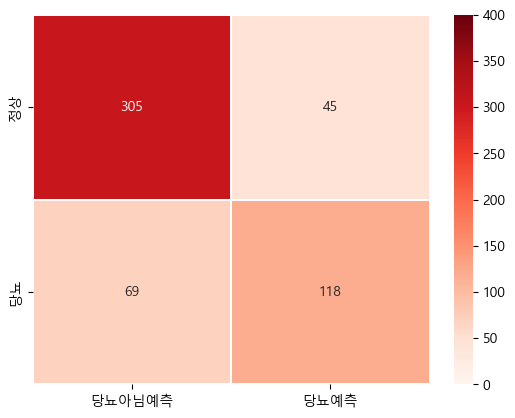

In [36]:
sb.heatmap( c ,annot=True, fmt='d', linewidths=0.2, cmap='Reds',vmin=0,
          vmax=400, xticklabels=['당뇨아님예측','당뇨예측'],
           yticklabels=['정상','당뇨'] )
plt.show()

In [37]:
print( h )

In [39]:
h.history.keys()

dict_keys(['loss', 'acc'])

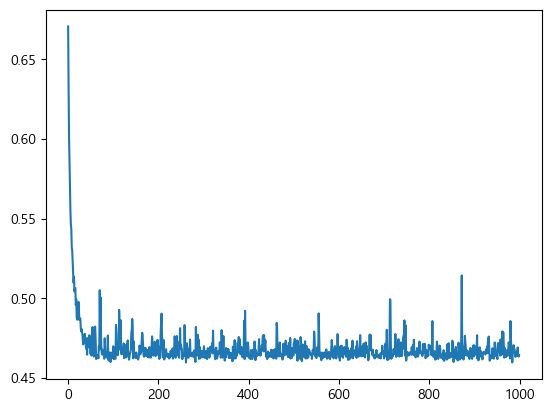

In [40]:
plt.plot( h.history['loss'])
plt.show()

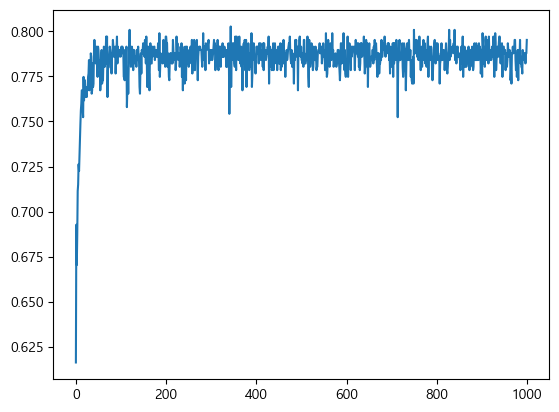

In [41]:
plt.plot( h.history['acc'])
plt.show()

In [43]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

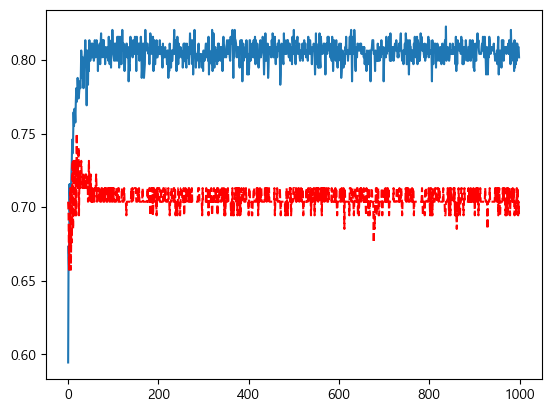

In [44]:
plt.plot( h.history['acc'])
plt.plot( h.history['val_acc'], 'r--')
plt.show()